<a href="https://colab.research.google.com/github/gulnuravci/machine_learning_w_pytorch_scikitlearn/blob/main/ch_2_adaptive_linear_neuron_(adeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaline: Adaptive Linear Neuron

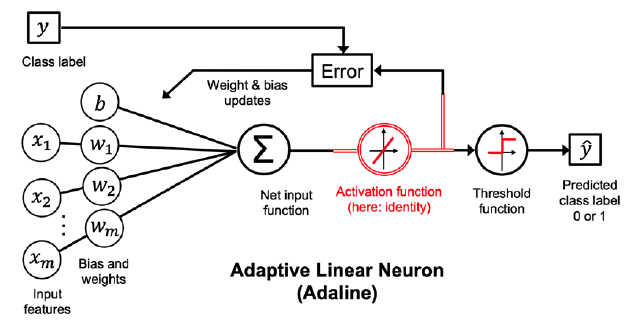

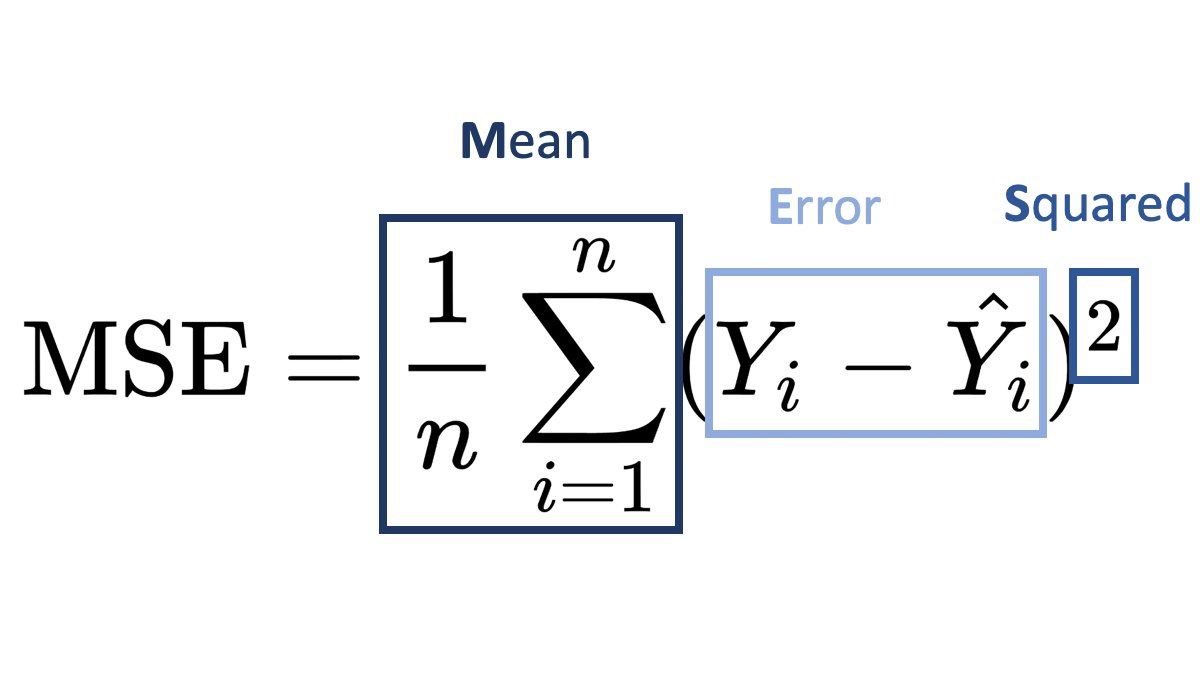

Adaline loss function is the mean squared error (MSE) between calculated outcome and true class label:

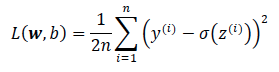

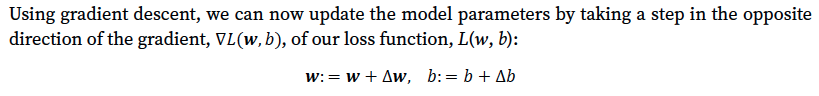

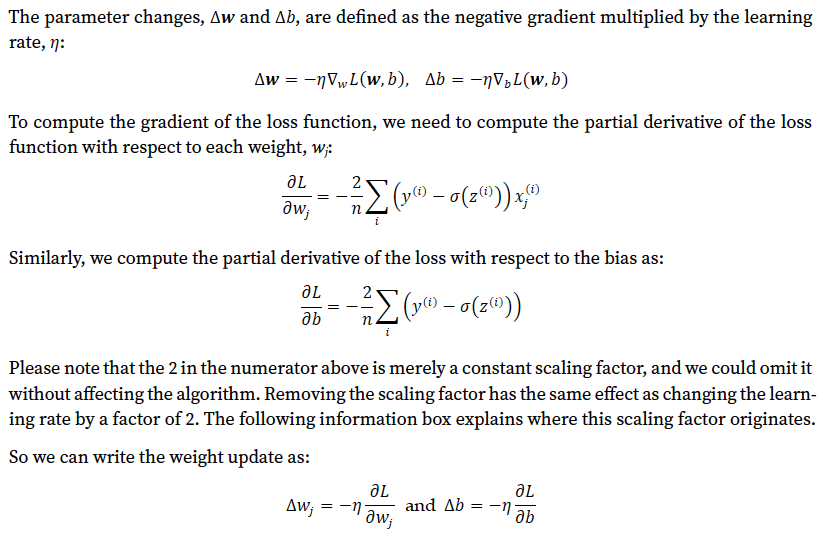

In [4]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [10]:
class AdalineGD:
  """ADAptive LInear NEuron classifier (gradient descent).'

  Parameters:
  learning_rate : float
    Learning rate (between 0.0 and 1.0)
  epochs : int
    Passes over the training dataset.
  random_seed : int
    Random number generator seed for random weight initialization.

  Attributes:
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.
  """
  def __init__(self, learning_rate=0.01, epochs=50, random_seed=42):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.random_seed = random_seed

  def fit(self, X, y):
    """
    Fit training data.

    Parameters:
    X: array-like, shape = [n_examples, n_features] (aka [rows, cols])
      Training vectors, where
      n_examples is the number of examples and
      n_features is the number of features.
    y: array-like, shape = [n_examples]
      Target values.

    Returns:
    self: object
    """
    r_gen = np.random.RandomState(self.random_seed)
    # generate as many random weights as there are features
    self.w_ = r_gen.normal(loc=0.0,
                           scale=0.01,
                           size=X.shape[1])
    # creates a NumPy scalar of type numpy.float64 with the value 0.0.
    self.b_ = np.float_(0.0)
    self.losses_ = []

    for _ in range(self.epochs):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output) # actual class - predicted class
      self.w_ += self.learning_rate * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.learning_rate * 2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    """Computer linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [6]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
# select setosa and versicolor get the fifth column for rows 0-99
y = df.iloc[0:100, 4].values
# mark setosa as 0 and versicolor as 1
# these are the class labels
y = np.where(y == "Iris-setosa", 0, 1)
# get two features:
# sepal length at column 0
# petal length at column 2
# get column 0 and 2 for rows 0-99
X = df.iloc[0:100, [0, 2]].values

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


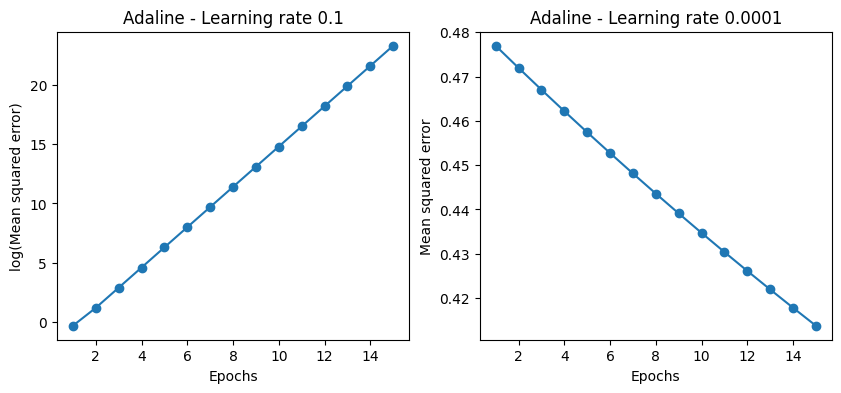

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(learning_rate=0.1, epochs=15).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
           np.log10(ada1.losses_),
           marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean squared error)")
ax[0].set_title("Adaline - Learning rate 0.1")

ada2 = AdalineGD(learning_rate=0.0001, epochs=15).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
           ada2.losses_,
           marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Mean squared error")
ax[1].set_title("Adaline - Learning rate 0.0001")

plt.show()

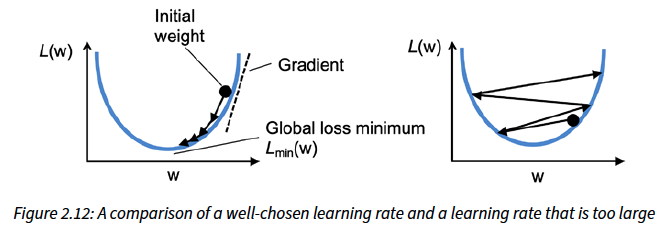

## Improve gradient descent through feature scaling

One of the reasons why standardization helps with gradient descent learning is that it is easier to find a
learning rate that works well for all weights (and the bias). If the features are on vastly different scales,
a learning rate that works well for updating one weight might be too large or too small to update the
other weight equally well. Overall, using standardized features can stabilize the training such that the
optimizer has to go through fewer steps to find a good or optimal solution (the global loss minimum).

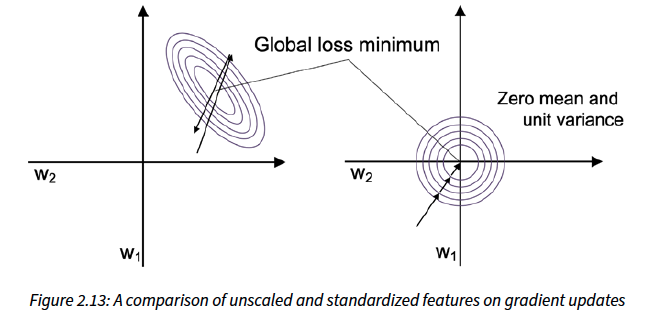

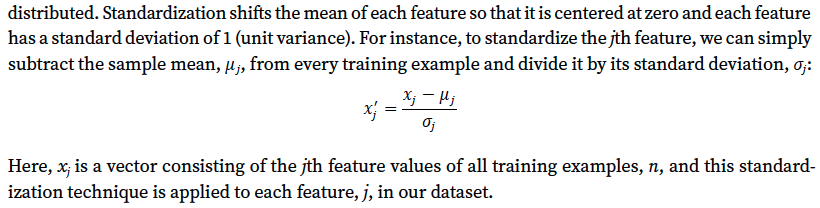

In [12]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [13]:
ada_gd = AdalineGD(learning_rate=0.5,
                   epochs=20)
ada_gd.fit(X_std, y)

In [14]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')  # Marker symbols for different classes
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  # Colors for different classes
  cmap = ListedColormap(colors[:len(np.unique(y))])  # Create a colormap based on unique class labels

  # Define the ranges for the grid (meshgrid) based on the input feature data X
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Range for feature 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Range for feature 2

  # Create a meshgrid using the defined ranges and resolution
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))

  # Predict the class labels for each point in the meshgrid
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  print("lab shape: ", lab.shape)  # Print the shape of the predicted labels
  lab = lab.reshape(xx1.shape)  # Reshape the predicted labels to match the shape of the meshgrid
  print("xx1.shape: ", xx1.shape)  # Print the shape of the meshgrid

  # Plot the decision regions based on the predicted labels
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())  # Set the x-axis limits
  plt.ylim(xx2.min(), xx2.max())  # Set the y-axis limits

  # Plot the data points for each class
  for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0],  # X coordinates for points of class cl
                  y=X[y == cl, 1],  # Y coordinates for points of class cl
                  alpha=0.8,  # Transparency of markers
                  c=colors[idx],  # Color for points of class cl
                  marker=markers[idx],  # Marker symbol for points of class cl
                  label=f'Class {cl}',  # Label for the legend
                  edgecolor='black')  # Edge color of markers

lab shape:  (75816,)
xx1.shape:  (243, 312)


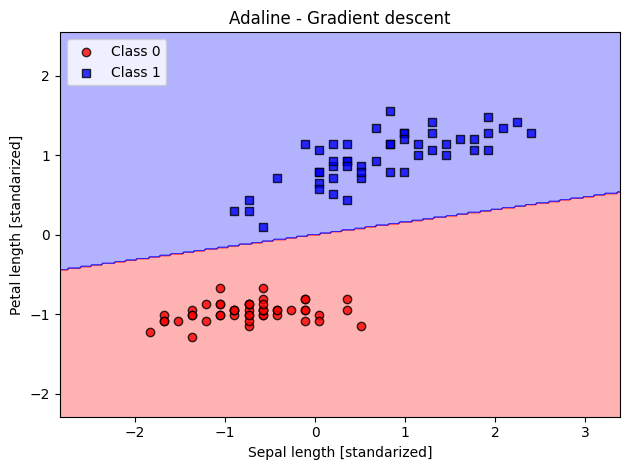

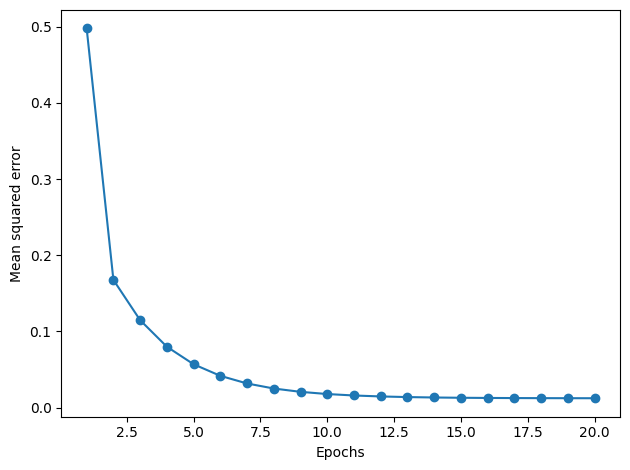

In [15]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient descent")
plt.xlabel("Sepal length [standarized]")
plt.ylabel("Petal length [standarized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_,
         marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.tight_layout()
plt.show()

## Stochastic gradient descent

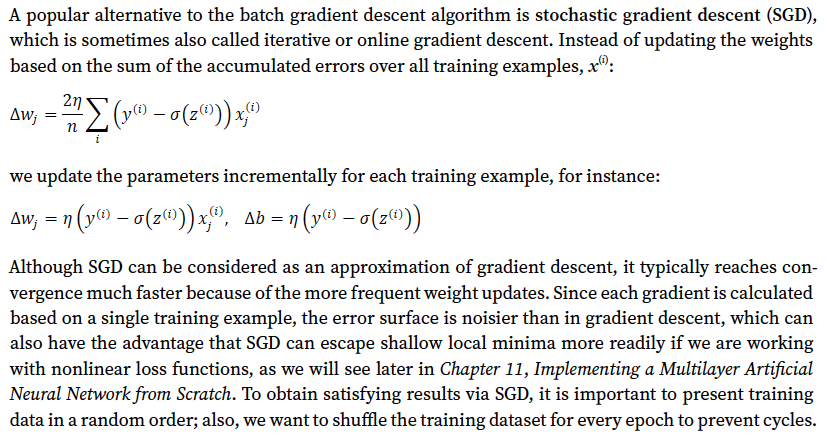

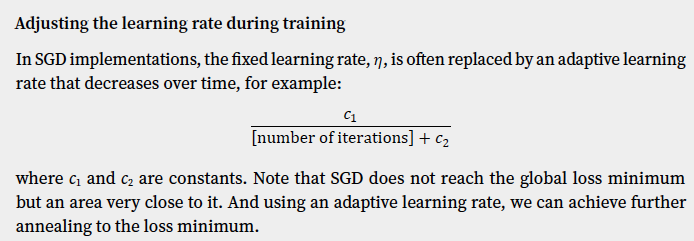

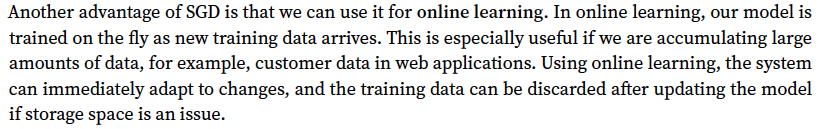

In [22]:
class AdalineSGD:
  """ADAptive LInear NEuron classifier (gradient descent).'

  Parameters:
  learning_rate : float
    Learning rate (between 0.0 and 1.0)
  epochs : int
    Passes over the training dataset.
  random_seed : int
    Random number generator seed for random weight initialization.

  Attributes:
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.
  """
  def __init__(self,
               learning_rate=0.01,
               epochs=10,
               shuffle=True,
               random_seed=None):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_seed = random_seed

  def fit(self, X, y):
    """
    Fit training data.

    Parameters:
    X: array-like, shape = [n_examples, n_features] (aka [rows, cols])
      Training vectors, where
      n_examples is the number of examples and
      n_features is the number of features.
    y: array-like, shape = [n_examples]
      Target values.

    Returns:
    self: object
    """
    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for i in range(self.epochs):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self, X, y):
    """For training data without reintializing the weights"""
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    # if there is more than one sample (X would be 2D)
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    # if there is one sample (X and y would both be 1D)
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    """Shuffle training data"""
    r = self.rgen.permutation(len(y))
    # This shuffles the rows of the input data according to the
    # order specified by the permutation r
    return X[r], y[r]

  def _initialize_weights(self, m):
    """Initialize weights to small random numbers"""
    self.rgen = np.random.RandomState(self.random_seed)
    self.w_ = self.rgen.normal(loc=0.0,
                               scale=0.01,
                               size=m)
    self.b_ = np.float_(0.0)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """Apply Adaline learning rule to update the weights."""
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_ += self.learning_rate * 2.0 * xi * (error)
    self.b_ += self.learning_rate * 2.0 * error
    loss = error**2
    return loss

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

lab shape:  (75816,)
xx1.shape:  (243, 312)


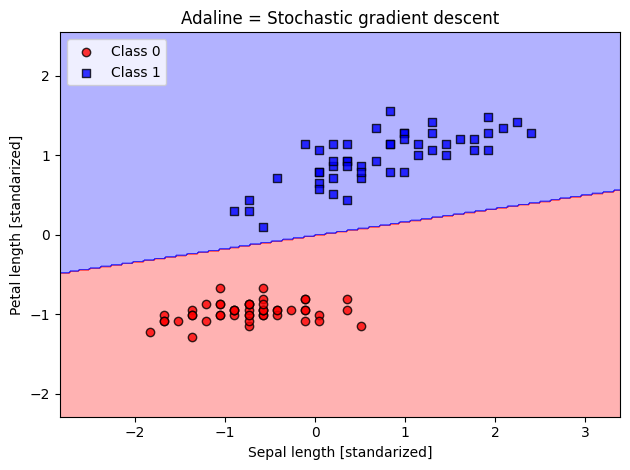

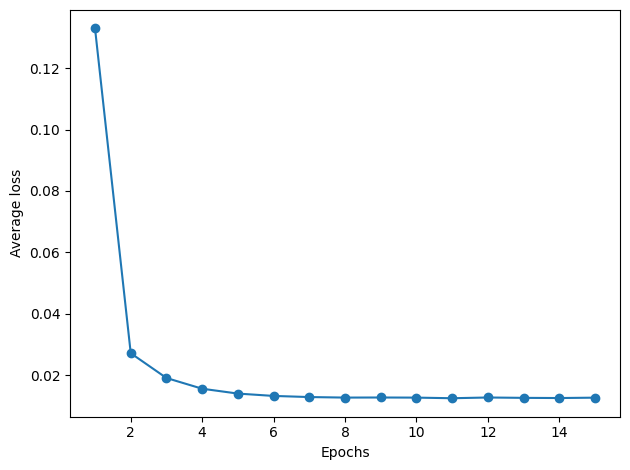

In [23]:
ada_sgd = AdalineSGD(learning_rate=0.01,
                     epochs=15,
                     random_seed=42)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline = Stochastic gradient descent")
plt.xlabel("Sepal length [standarized]")
plt.ylabel("Petal length [standarized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1),
         ada_sgd.losses_,
         marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average loss")
plt.tight_layout()
plt.show()

In [24]:
ada_sgd.partial_fit(X_std[0, :], y[0])